In [ ]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
import scipy.stats

plt.rcParams["figure.figsize"] = (12, 7)
# plt.rc('text', usetex=True)
from pathlib import Path

In [ ]:
plt.rcParams["ytick.right"] = plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 12.0
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.columnspacing"] = 0.2
plt.rcParams["legend.handletextpad"] = 0.2
plt.rcParams["legend.labelspacing"] = 0.2
plt.rcParams["legend.borderpad"] = 0
plt.rcParams["legend.handlelength"] = 1.0

In [ ]:
bp = Path.home() / "dev" / "acts-core" / "build"
print(bp)

In [ ]:
df = pd.read_csv(bp / "solenoid.csv", delimiter=";")
df["B"] = np.sqrt(df.B_x**2 + df.B_y**2 + df.B_z**2)
display(df.head())
display(df.tail())

,x,y,z,B_x,B_y,B_z,B
0,0.0,0,0.0,0.0,0,0.000600,0.000600
1,0.0,0,217.5,0.0,0,0.000599,0.000599
2,0.0,0,-217.5,0.0,0,0.000599,0.000599
3,0.0,0,435.0,0.0,0,0.000597,0.000597
4,0.0,0,-435.0,0.0,0,0.000597,0.000597


,x,y,z,B_x,B_y,B_z,B
1594,-1788.38,0,-4132.5,0.000103,0,-0.000002,0.000103
1595,1788.38,0,4350.0,0.000094,0,-0.000001,0.000094
1596,1788.38,0,-4350.0,-0.000094,0,-0.000001,0.000094
1597,-1788.38,0,4350.0,-0.000094,0,-0.000001,0.000094
1598,-1788.38,0,-4350.0,0.000094,0,-0.000001,0.000094


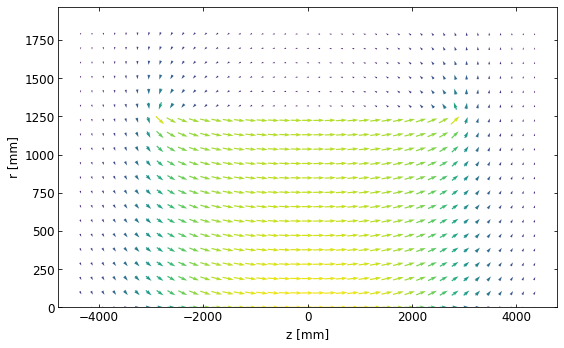

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.quiver(df.z, df.x, df.B_z, df.B_x, df.B, pivot="mid")
ax.set_ylim(bottom=0)
ax.set_xlabel("z [mm]")
ax.set_ylabel("r [mm]")
fig.tight_layout()
fig.savefig(bp.parent / "quiver.png", dpi=150)

In [ ]:
dfmap = pd.read_csv(bp / "solenoidmap.csv", delimiter=";")
dfmap["B"] = np.sqrt(dfmap.B_r**2 + dfmap.B_z**2)  # *1e16
# df.i = df.i.astype(int)
# df.j = df.j.astype(int)
nBinsR = dfmap.i.max()
nBinsZ = dfmap.j.max()
rmin = dfmap.r.min()
rmax = dfmap.r.max()
zmin = dfmap.z.min()
zmax = dfmap.z.max()
rmax -= rmax / nBinsR
print(nBinsR, nBinsZ)
print(rmin, rmax, zmin, zmax)
display(dfmap.head())
display(dfmap.tail())

150 200
0.0 2493.266666666667 -5800.0 5800.0


,i,j,r,z,B_r,B_z,B
0,1,1,0.0,-5800.00,0.0,0.000024,0.000024
1,1,2,0.0,-5741.71,0.0,0.000024,0.000024
2,1,3,0.0,-5683.42,0.0,0.000025,0.000025
3,1,4,0.0,-5625.13,0.0,0.000026,0.000026
4,1,5,0.0,-5566.83,0.0,0.000028,0.000028


,i,j,r,z,B_r,B_z,B
29995,150,196,2510.0,5566.83,0.000052,-0.000010,0.000052
29996,150,197,2510.0,5625.13,0.000051,-0.000009,0.000052
29997,150,198,2510.0,5683.42,0.000050,-0.000009,0.000051
29998,150,199,2510.0,5741.71,0.000049,-0.000009,0.000050
29999,150,200,2510.0,5800.00,0.000049,-0.000009,0.000050


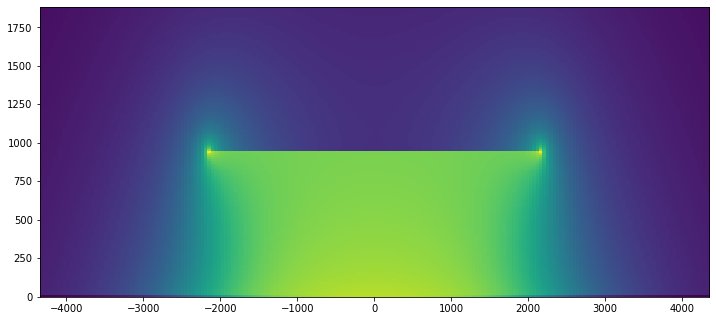

In [ ]:
# hist, xedges, yedges = np.histogram2d([], [], bins=(nBinsZ, nBinsR), range=((zmin, zmax), (rmin, rmax)))
# extent  = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


hist = np.zeros((nBinsR - 1, nBinsZ))

for index, row in dfmap.iterrows():
    i, j = int(row.i - 1), int(row.j - 1)
    if i < nBinsR - 1:
        hist[i][j] = row.B

    # hist[int(row.i-1), int(row.j-1)] = math.sqrt(row.B_r**2 + row.B_z**2)

# print(hist)
fig, ax = plt.subplots()
ax.imshow(hist, origin="lower", extent=(zmin, zmax, rmin, rmax), aspect=2)
fig.savefig(Path.home() / "dev/acts-core/solenoid.png")

In [ ]:
# z, r = np.mgrid[-4.:4.:400j,-2.:2.:200j]
# z, r

In [ ]:
df = pd.read_csv(
    "/Users/pagessin/dev/acts-core/build/magfield_lookup.csv", delimiter=";"
)
df["r"] = np.sqrt(df.x**2 + df.y**2)
df["B_r"] = np.sqrt(df.B_x**2 + df.B_y**2)
df["B"] = np.sqrt(df.B_x**2 + df.B_y**2 + df.B_z**2)
df["Bm_r"] = np.sqrt(df.Bm_x**2 + df.Bm_y**2)
df["Bm"] = np.sqrt(df.Bm_x**2 + df.Bm_y**2 + df.Bm_z**2)
df["Berr"] = (df.B - df.Bm) / df.B
df["Babserr"] = np.abs(df.B - df.Bm) / df.B
df["B_ratio"] = df.Bm / df.B
# display(df.head())
# display(df.tail())

In [ ]:
# df = df[df["r"] < 1220]

In [ ]:
rmin, rmax = math.floor(df.r.min()), math.ceil(df.r.max())
zmin, zmax = math.floor(df.z.min()), math.ceil(df.z.max())
print(rmin, rmax, zmin, zmax)

0 1882 -4349 4350


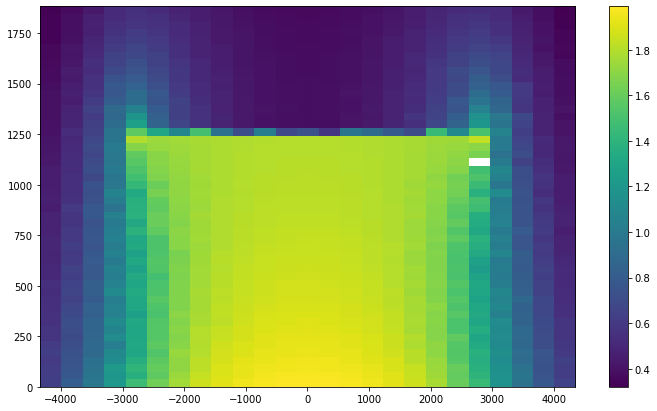

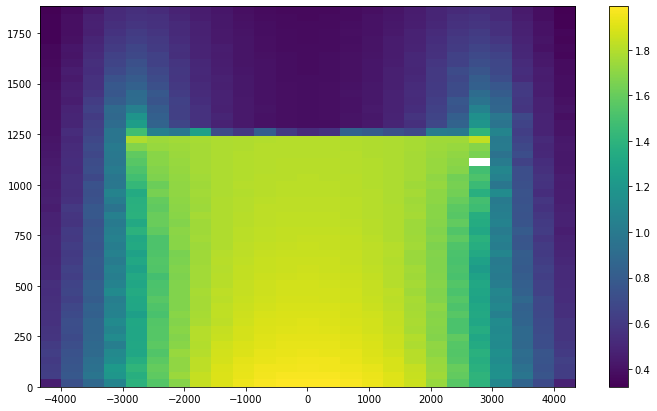

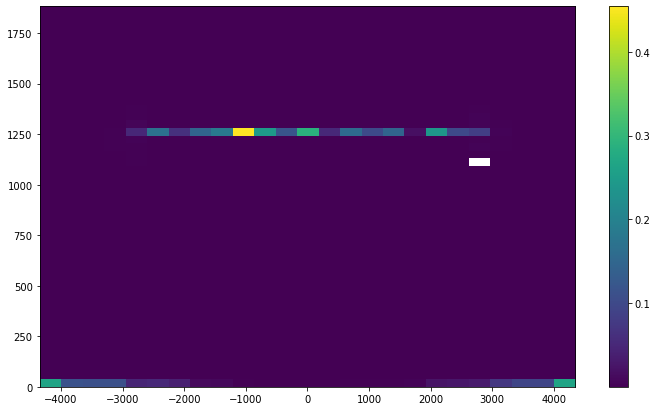

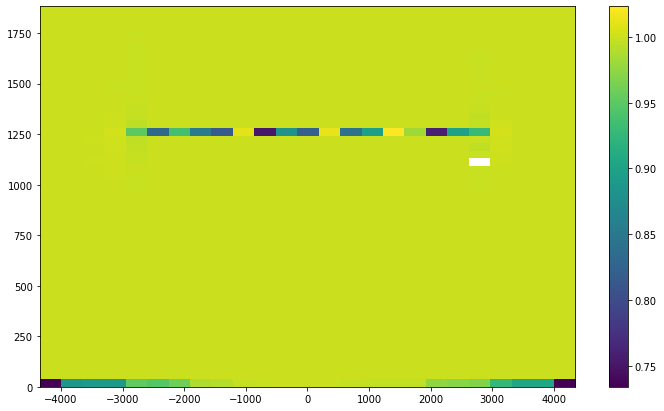

In [ ]:
def hist(x, y, v, bins, extent):
    hist, *_ = scipy.stats.binned_statistic_2d(x, y, v, bins=bins)
    plt.imshow(hist, origin="lower", extent=extent, aspect="auto")


bins = (50, 25)

hist(df.r, df.z, df.B, bins=bins, extent=(zmin, zmax, rmin, rmax))
plt.colorbar()
plt.show()
hist(df.r, df.z, df.Bm, bins=bins, extent=(zmin, zmax, rmin, rmax))
plt.colorbar()
plt.show()
hist(df.r, df.z, df.Babserr, bins=bins, extent=(zmin, zmax, rmin, rmax))
plt.colorbar()
plt.show()
hist(df.r, df.z, df.B_ratio, bins=bins, extent=(zmin, zmax, rmin, rmax))
plt.colorbar()
plt.show()

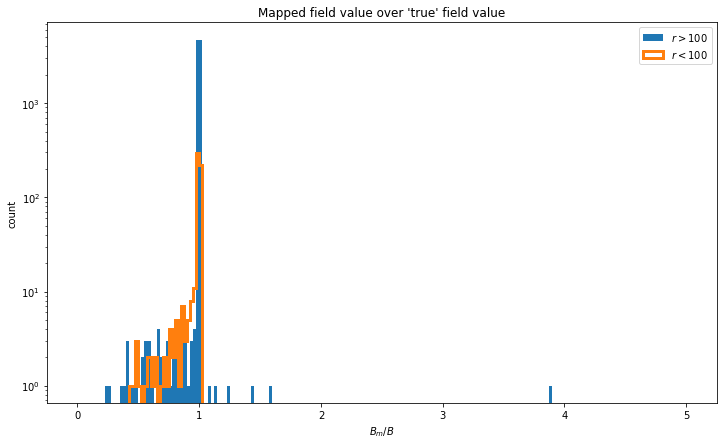

In [ ]:
plt.semilogy()
bins = 200
# print(plt.xlabel)
plt.title("Mapped field value over 'true' field value")
plt.xlabel(r"$B_{m}/B$")
plt.ylabel("count")
plt.hist(df.B_ratio[df.r > 100], bins=bins, range=(0, 5), label=r"$r>100$")
plt.hist(
    df.B_ratio[df.r < 100],
    histtype="step",
    bins=bins,
    range=(0, 5),
    fill=False,
    linewidth=3,
    label=r"$r<100$",
)
plt.legend()
# df.Berr[df.Berr > -2].min()

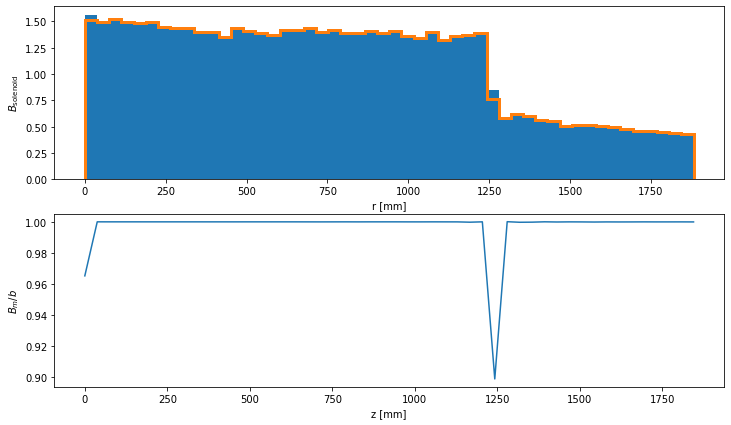

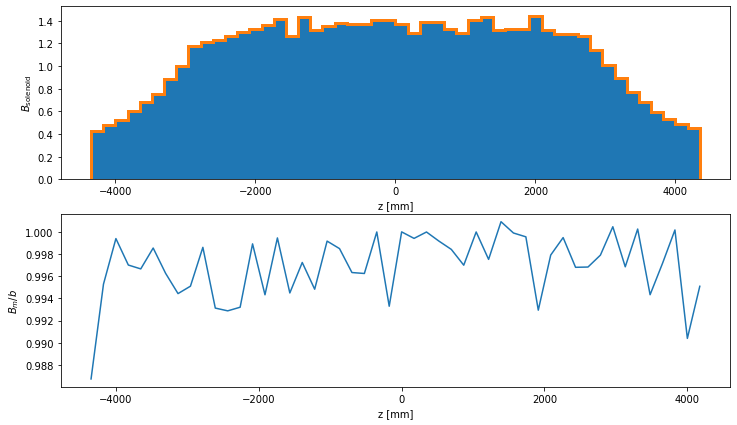

In [ ]:
def hist1d(x, y, **kwargs):
    x = np.copy(x)
    step = abs(x[1] - x[0])
    xmin, xmax = x.min(), x.max()
    # print(x)
    x += step / 2
    # print(x)
    plt.hist(x[:-1], bins=len(x) - 1, weights=y, range=(xmin, xmax), **kwargs)


plt.subplot(211)
hist, bin_edges_r, _ = scipy.stats.binned_statistic(df.r, df.B, bins=50)
plt.xlabel("r [mm]")
plt.ylabel(r"$B_{\rm{solenoid}}$")
hist1d(bin_edges_r, hist)
hist_bm, _, _ = scipy.stats.binned_statistic(df.r, df.Bm, bins=50)
hist1d(bin_edges_r, hist_bm, histtype="step", fill=False, lw=3)

ratio_r = hist_bm / hist
plt.subplot(212)
plt.plot(bin_edges_r[:-1], ratio_r)
plt.xlabel("z [mm]")
plt.ylabel(r"$B_m / b$")
plt.show()

plt.subplot(211)
hist, bin_edges_z, _ = scipy.stats.binned_statistic(df.z, df.B, bins=50)
plt.xlabel("z [mm]")
plt.ylabel(r"$B_{\rm{solenoid}}$")
hist1d(bin_edges_z, hist)
hist_bm, _, _ = scipy.stats.binned_statistic(df.z, df.Bm, bins=50)
hist1d(bin_edges_z, hist_bm, histtype="step", fill=False, lw=3)

ratio_z = hist_bm / hist
plt.subplot(212)
plt.plot(bin_edges_z[:-1], ratio_z)
plt.xlabel("z [mm]")
plt.ylabel(r"$B_m / b$")
plt.show()